# Analysis of WSPs for quantifying hardness

## Setting Up Imports

In [12]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_pickle("results.pkl")
df["wsp/point"] = df["wsp_count_2.0"] / df["num_points"]

print("Number of optimatlly solved instances: ", df["opt_len"].isna().sum())

df

Number of optimatlly solved instances:  113


,num_points,opt_len,nn_len,untouched_len,nwsp5_2_len,nwsp5_len,wsp_count_2.0,ls_len,ls_q_len,wsp/point
name,,,,,,,,,,
a280,280,2.586770e+03,3.161004e+03,4.847061e+03,NaN,NaN,2571,2769.255661,2956.917525,9.182143
ara238025,238025,NaN,7.591498e+05,1.176390e+06,NaN,NaN,3032365,NaN,NaN,12.739691
bby34656,34656,NaN,1.253833e+05,1.966541e+05,NaN,NaN,412676,NaN,NaN,11.907779
bbz25234,25234,NaN,8.772034e+04,1.414553e+05,NaN,NaN,299703,NaN,NaN,11.876952
bch2762,2762,NaN,1.073362e+04,1.624823e+04,NaN,NaN,28611,NaN,NaN,10.358798
...,...,...,...,...,...,...,...,...,...,...
venus140K,140000,6.815401e+06,8.127712e+06,1.371360e+09,NaN,NaN,2678195,NaN,NaN,19.129964
pareja160K,160000,7.624870e+06,9.086707e+06,1.673396e+09,NaN,NaN,2966866,NaN,NaN,18.542912
courbet180K,180000,7.894985e+06,9.407409e+06,1.868348e+09,NaN,NaN,3440440,NaN,NaN,19.113556


## Calculating and Plotting global WSP density

207


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          wsp_count_2.0   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              5350.
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                   2.36e-149
Time:                        14:39:46   Log-Likelihood:                         -2814.0
No. Observations:                 207   AIC:                                      5630.
Df Residuals:                     206   BIC:                                      5633.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
num_points    13.7741      0.188     73.142      0.000      13.403      14.145
==============================================================================
Omnibus:                       99.812   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6217.073
Skew:                           0.908   Prob(JB):                         0.00
Kurtosis:                      29.787   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

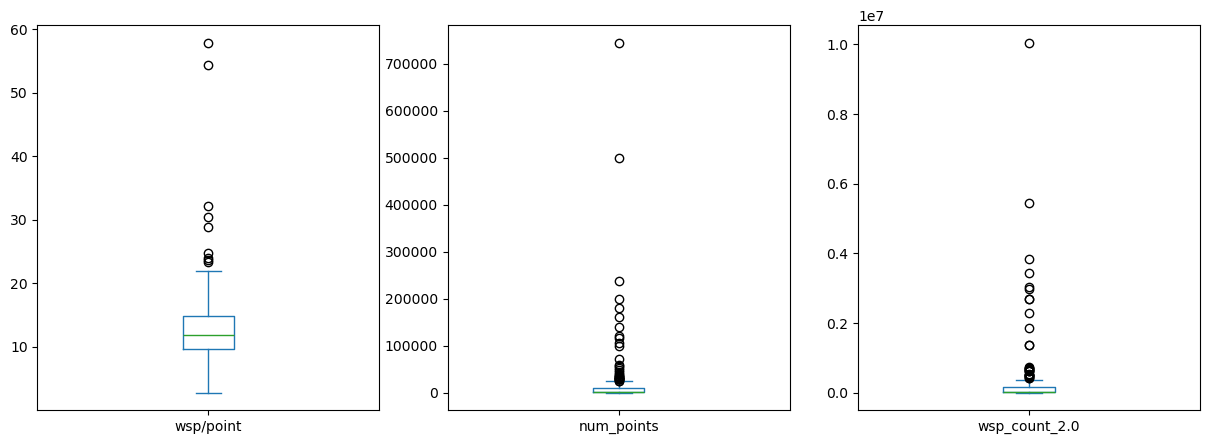

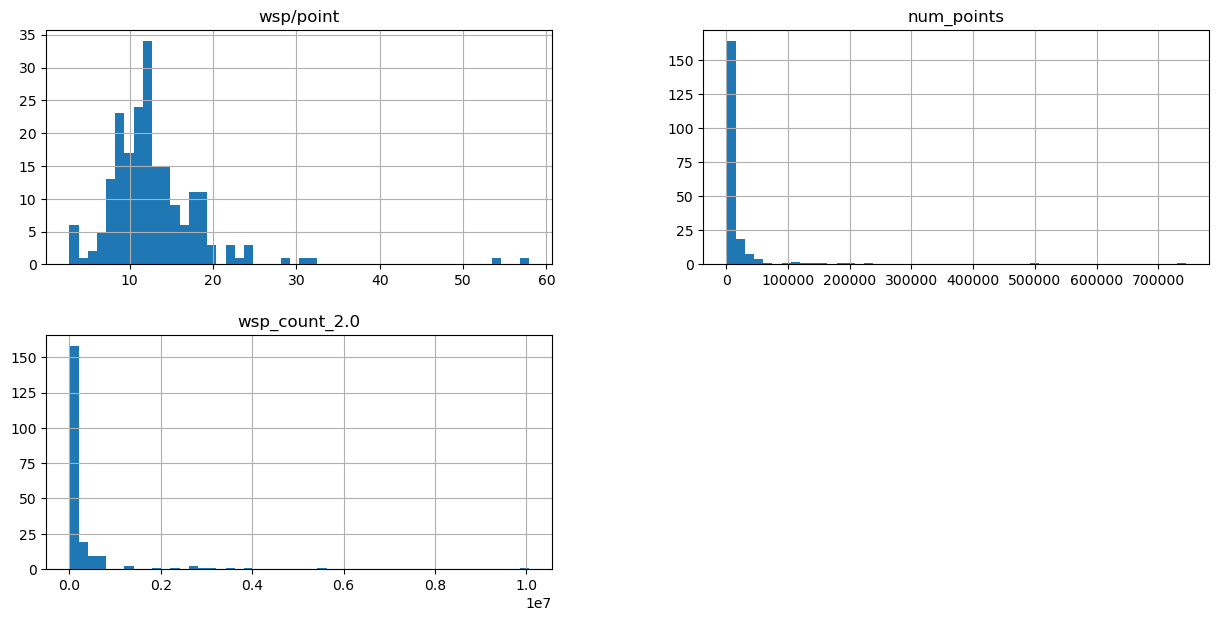

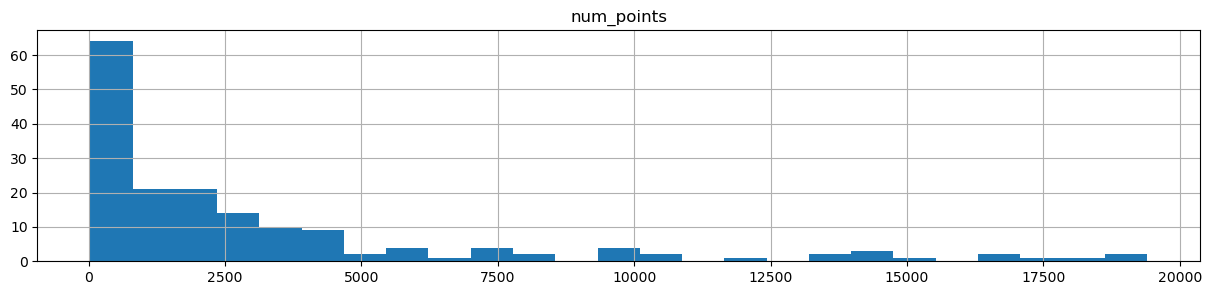

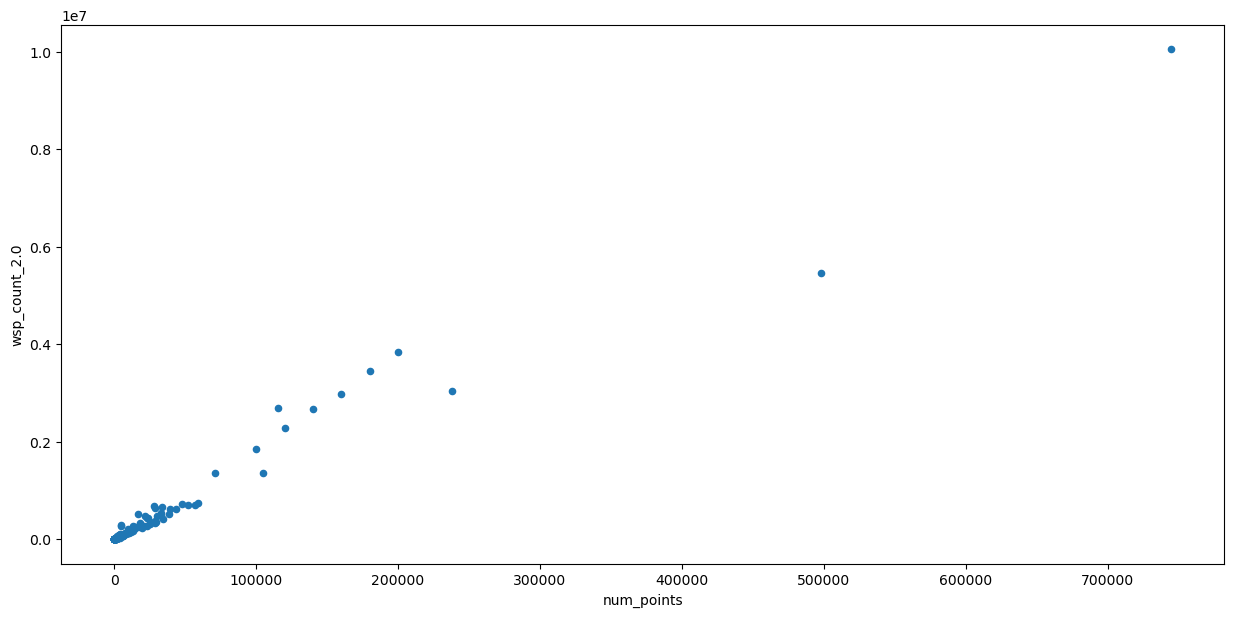

In [13]:
# Remove NAN wsp_counts and tell cells their format
df = df[~df['wsp_count_2.0'].isna()]
print(len(df))

fig, axs = plt.subplots(1,3, figsize=(15,5))
df["wsp/point"].plot.box(ax=axs[0])
df["num_points"].plot.box(ax=axs[1])
df["wsp_count_2.0"].plot.box(ax=axs[2])

df.hist(column=["wsp/point", "num_points", "wsp_count_2.0"], bins=50, figsize=(15,7))
df[df["num_points"] < 20000].hist(column=["num_points"], bins=25, figsize=(15,3))

df.plot.scatter("num_points", "wsp_count_2.0", figsize=(15,7)) # TODO: make this graph look better

results = sm.OLS(df["wsp_count_2.0"].astype(int), df["num_points"].astype(int)).fit()
results.summary()

## Remove problems which don't have a optimum (or near optimum) solution

In [14]:
df = df[~df['opt_len'].isna()] # remove problems without optimal lens

## Calculate the error for each algorithm to the optimum (or near optimum)

In [15]:
df["nn error"] = df["nn_len"] / df["opt_len"]
df['ls error'] = df["ls_len"] / df["opt_len"]
df["lsq error"] = df["ls_q_len"] / df["opt_len"]
print(len(df))
df["num_points"].describe()

94


/var/folders/_t/4_m8pb3d3xs763zf2ztl10k40000gn/T/ipykernel_68092/806009762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nn error"] = df["nn_len"] / df["opt_len"]
/var/folders/_t/4_m8pb3d3xs763zf2ztl10k40000gn/T/ipykernel_68092/806009762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ls error'] = df["ls_len"] / df["opt_len"]
/var/folders/_t/4_m8pb3d3xs763zf2ztl10k40000gn/T/ipykernel_68092/806009762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

count            94.0
mean      16187.56383
std      39097.909792
min              29.0
25%             414.0
50%            2061.0
75%           10106.5
max          200000.0
Name: num_points, dtype: Float64

## Plot analysis of WSPs hardness wrt. nearest neighbour

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               nn error   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              691.9
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                    1.39e-44
Time:                        14:41:15   Log-Likelihood:                         -53.776
No. Observations:                  93   AIC:                                      109.6
Df Residuals:                      92   BIC:                                      112.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wsp/point      0.0843      0.003     26.304      0.000       0.078       0.091
==============================================================================
Omnibus:                       25.124   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.666
Skew:                          -1.124   Prob(JB):                     8.96e-10
Kurtosis:                       5.388   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

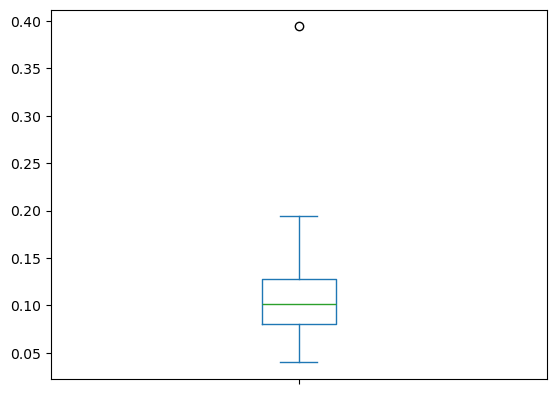

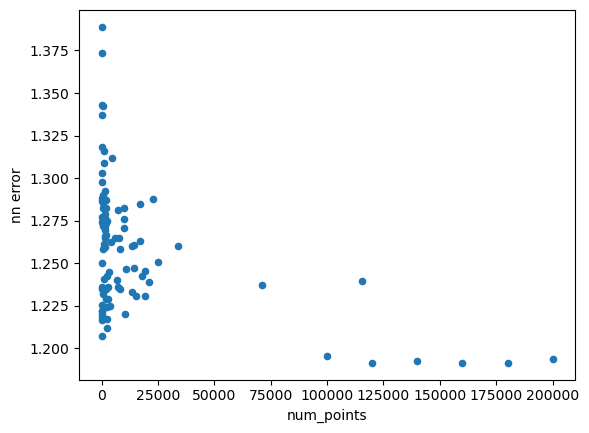

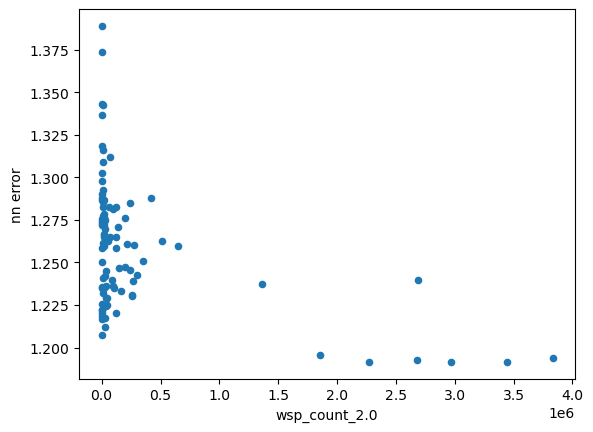

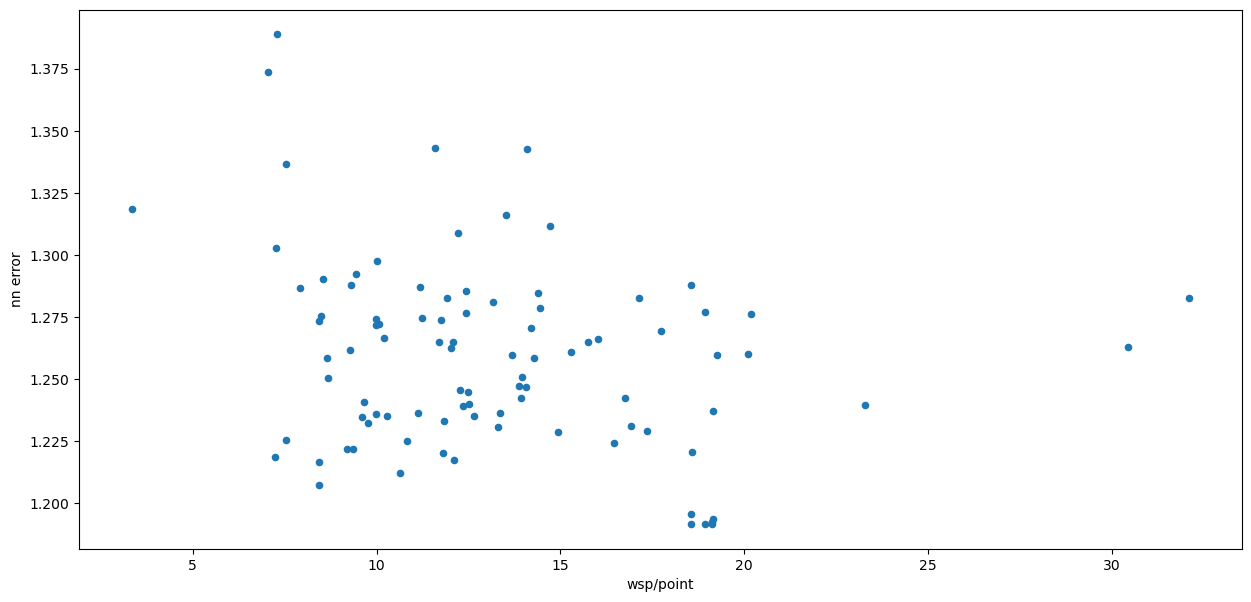

In [18]:
# df = df.drop("dj38") # outlier screws up how graph renders r^2 is 0.88 w/o them
# df = df.drop("dkd1973")

(df["nn error"] / df["wsp/point"]).plot.box()

df.plot.scatter("num_points", "nn error")
df.plot.scatter("wsp_count_2.0", "nn error")
fig, ax = plt.subplots(figsize=(15,7))
df.plot.scatter("wsp/point", "nn error", ax=ax)

# for k, v in df.iterrows():
#     ax.annotate(k, (v["wsp/point"], v["nn error"]))

results = sm.OLS(df["nn error"].astype(float), df["wsp/point"].astype(float)).fit()
results.summary()

## Plot analysis of WSPs hardness wrt. local search based on nearest neighbour

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               ls error   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                              341.2
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                    2.66e-19
Time:                        14:41:54   Log-Likelihood:                         -10.357
No. Observations:                  35   AIC:                                      22.71
Df Residuals:                      34   BIC:                                      24.27
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wsp/point      0.0970      0.005     18.472      0.000       0.086       0.108
==============================================================================
Omnibus:                       10.906   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.031
Skew:                          -1.147   Prob(JB):                      0.00664
Kurtosis:                       4.269   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

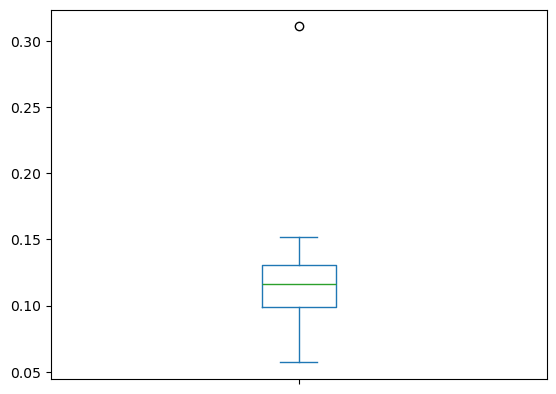

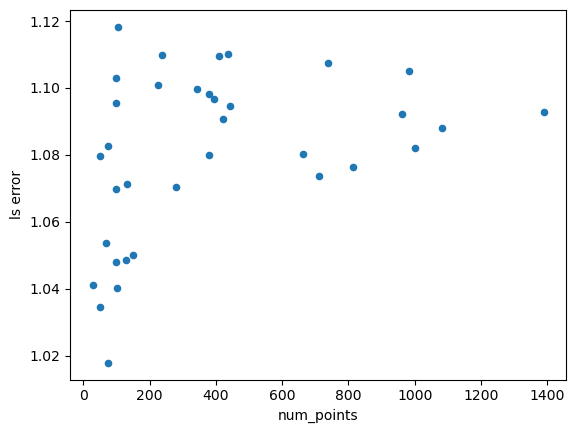

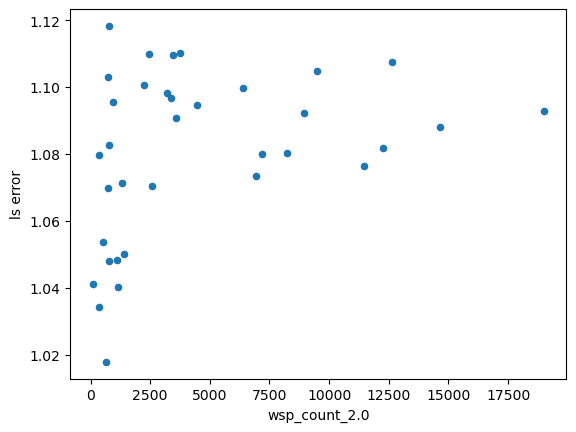

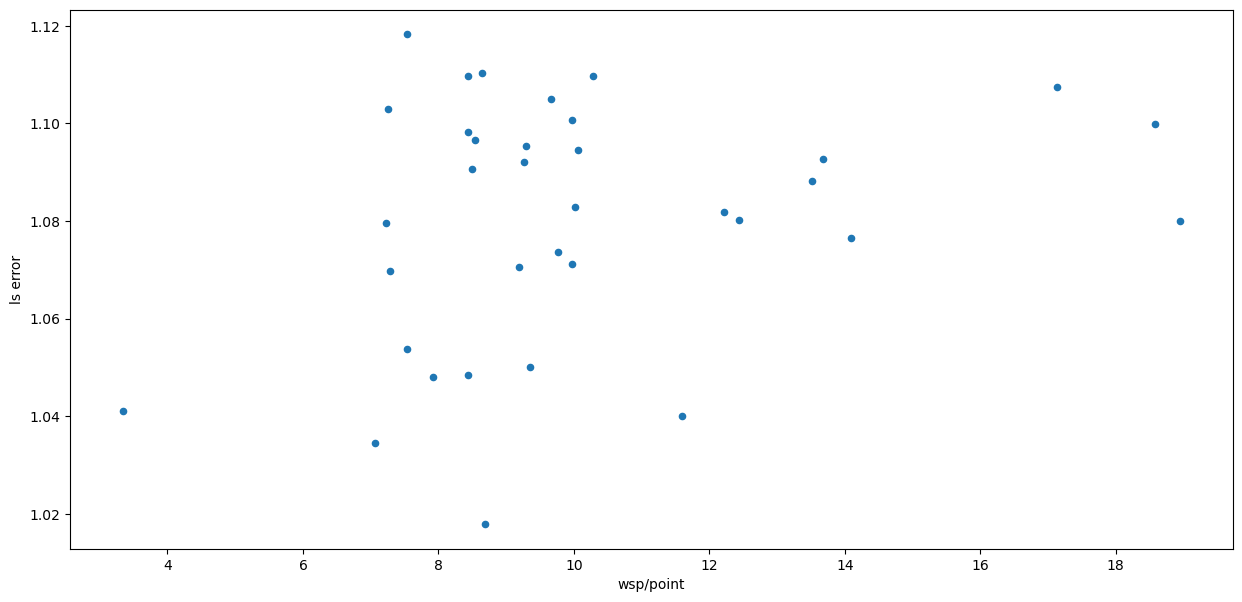

In [19]:
dfs = df[~df['ls_len'].isna()] # remove problems without optimal lens

(dfs["ls error"] / dfs["wsp/point"]).plot.box()

dfs.plot.scatter("num_points", "ls error")
dfs.plot.scatter("wsp_count_2.0", "ls error")
fig, ax = plt.subplots(figsize=(15,7))
dfs.plot.scatter("wsp/point", "ls error", ax=ax)

# for k, v in dfs.iterrows():
#     ax.annotate(k, (v["wsp/point"], v["nn error"]))

results = sm.OLS(dfs["ls error"].astype(float), dfs["wsp/point"].astype(float)).fit()
results.summary()

## Plot analysis of WSPs hardness wrt. quick local search based on nearest neighbour

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              lsq error   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              354.1
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                    1.49e-19
Time:                        14:41:59   Log-Likelihood:                         -12.295
No. Observations:                  35   AIC:                                      26.59
Df Residuals:                      34   BIC:                                      28.15
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wsp/point      0.1045      0.006     18.819      0.000       0.093       0.116
==============================================================================
Omnibus:                       10.173   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                9.105
Skew:                          -1.137   Prob(JB):                       0.0105
Kurtosis:                       4.036   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

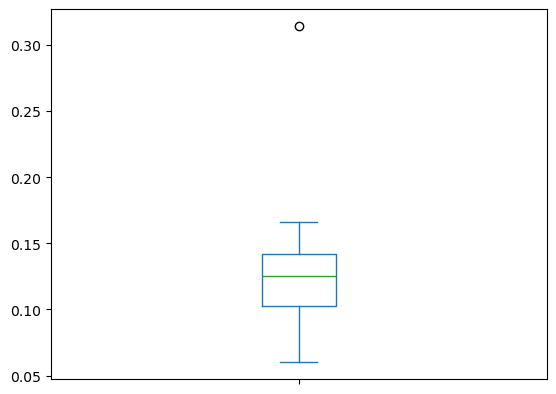

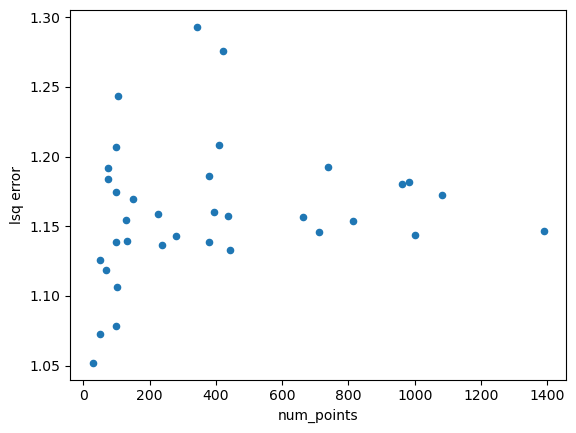

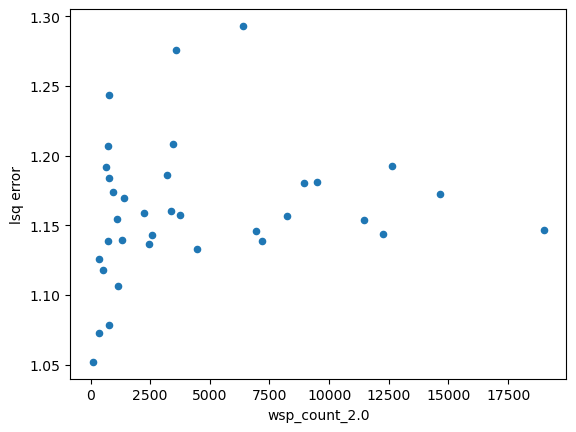

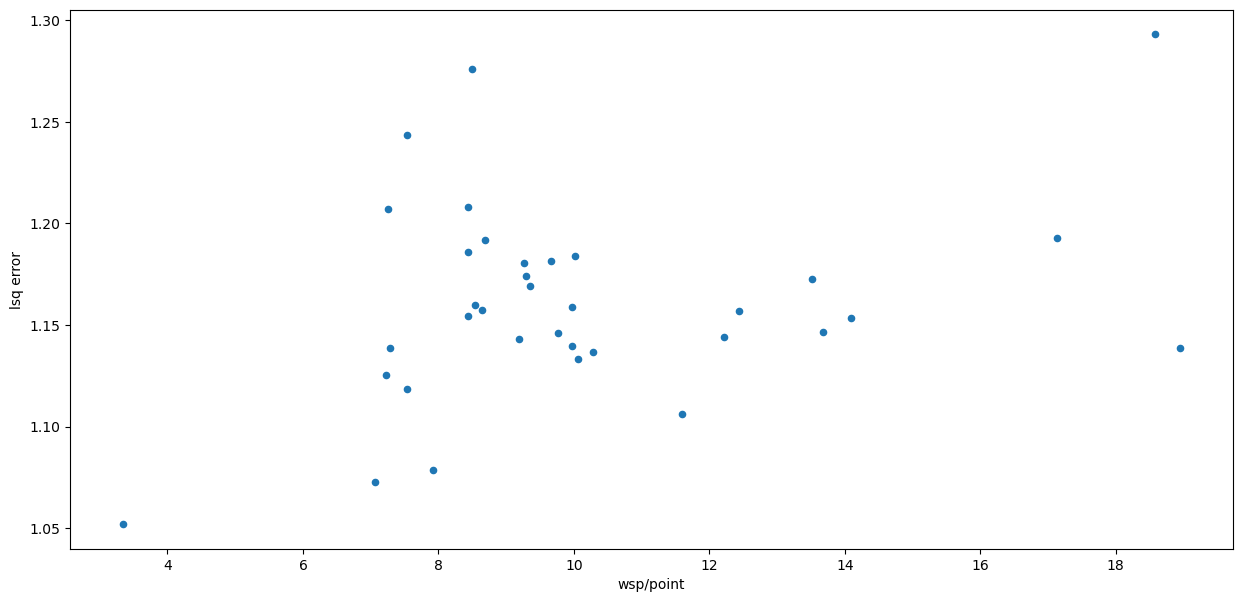

In [20]:
dfs = df[~df['ls_q_len'].isna()] # remove problems without optimal lens

(dfs["lsq error"] / dfs["wsp/point"]).plot.box()

dfs.plot.scatter("num_points", "lsq error")
dfs.plot.scatter("wsp_count_2.0", "lsq error")
fig, ax = plt.subplots(figsize=(15,7))
dfs.plot.scatter("wsp/point", "lsq error", ax=ax)

results = sm.OLS(dfs["lsq error"].astype(float), dfs["wsp/point"].astype(float)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              lsq error   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              354.1
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                    1.49e-19
Time:                        14:42:03   Log-Likelihood:                         -12.295
No. Observations:                  35   AIC:                                      26.59
Df Residuals:                      34   BIC:                                      28.15
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wsp/point      0.1045      0.006     18.819      0.000       0.093       0.116
==============================================================================
Omnibus:                       10.173   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                9.105
Skew:                          -1.137   Prob(JB):                       0.0105
Kurtosis:                       4.036   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

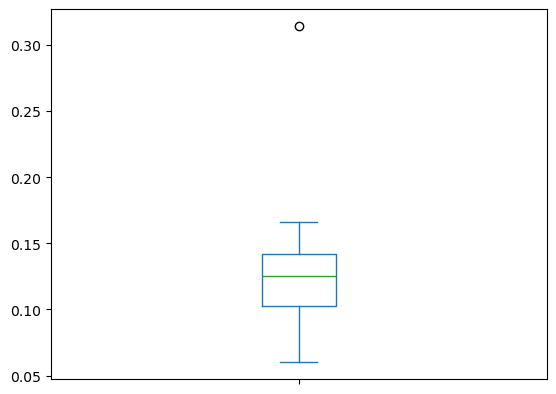

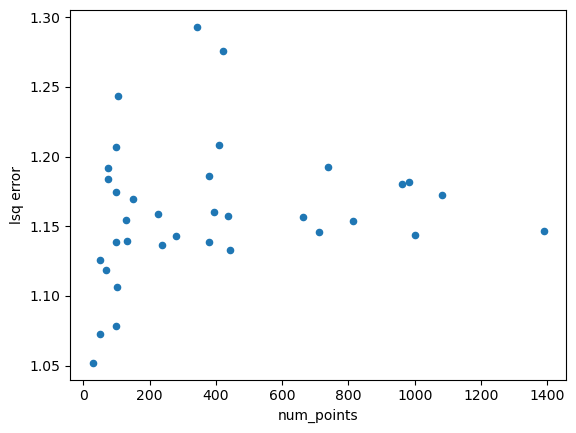

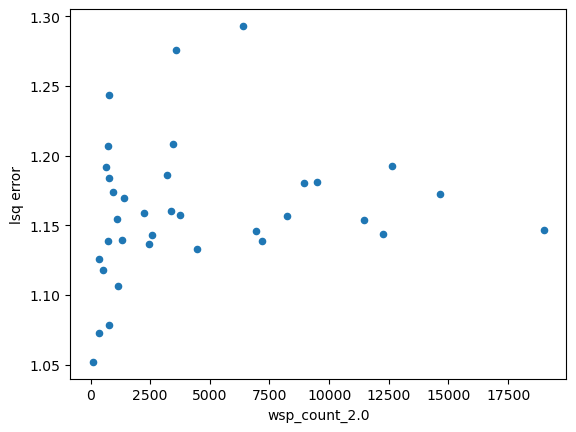

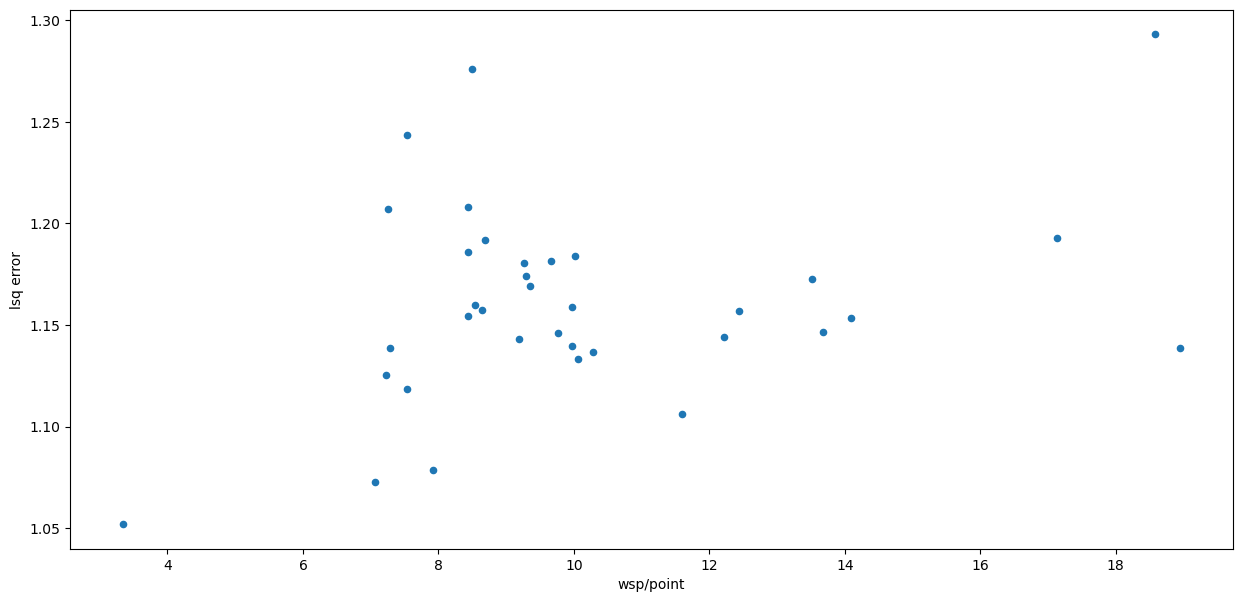

In [21]:
dfs = df[~df['ls_q_len'].isna()] # remove problems without optimal lens

(dfs["lsq error"] / dfs["wsp/point"]).plot.box()

dfs.plot.scatter("num_points", "lsq error")
dfs.plot.scatter("wsp_count_2.0", "lsq error")
fig, ax = plt.subplots(figsize=(15,7))
dfs.plot.scatter("wsp/point", "lsq error", ax=ax)

results = sm.OLS(dfs["lsq error"].astype(float), dfs["wsp/point"].astype(float)).fit()
results.summary()